# Results From Conway Game of Life Simulations using CUDA


By: Tanmay Grandhisiri

## Directions for your instructor

Include detailed instructions for compiling and reproducing the results you have in this report.  Automate as much of the steps as possible to help speed up grading.


A good idea is to show your specific commands here in the jupyter notebook.  Use the exclamation point (!) to run bash commands inside of jupyter. For example:

Change the cc to gcc in makefile if you want to test part 1, change cc to nvcc for parts 2 and execute the commands:
1. make
2. make clean
3. make test

## Serial Experiment

I compiled the serial code on dev-amd20-v100 using the following commands:

```
make

make clean

make test
```

The command below is used for part 1 testing: 100 is replaced with 5,10,15,20,25.
```
time echo "0 100" | ./gol

In ran the code `5` times on `dev-amd20-v100` and obtained the following results:

```
iterations = [5,10,15,20,25]
times = np.array([62.92,91.569,121.26,141.977,172.66])
```

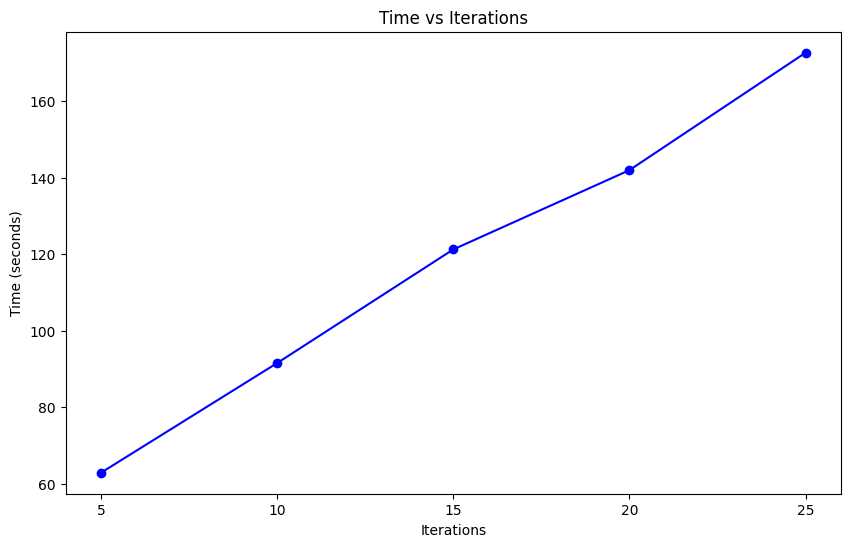

## Compiler Optimization

Describe changes you made to the code compiler to try and make it go faster

* Idea 1
* Idea 2
* etc...

Show your timing results as either a table or a graph.

## CUDA Speedup

Describe what you did to speed up your code using CUDA

* Idea 1
* Idea 2
* etc...

Show your timing results as either a table or a graph.

## Concluding Discussion

Describe what you learned during this process, what worked, what didn't work, where did you have trouble and what you learned

----